In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

2025-04-05 16:24:36.684202: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Step 1: Load and preprocess the data
vocab_size = 10000
max_length = 250
trunc_type = 'post'
padding_type = 'post'
oov_token = "<OOV>"

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)


In [4]:
x_train = pad_sequences(x_train, maxlen=max_length, padding=padding_type, truncating=trunc_type)
x_test = pad_sequences(x_test, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [5]:
# Step 2: Build the improved model
model = Sequential([
    Embedding(vocab_size, 128, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(32)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])


2025-04-05 16:26:41.830697: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-04-05 16:26:41.830811: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-04-05 16:26:41.831039: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-04-05 16:26:41.831374: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-05 16:26:41.831655: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2025-04-05 16:26:42.299638: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore thi

In [6]:
# Step 3: Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])

In [8]:
# Step 4: Train the model
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(x_test, y_test))

Epoch 1/5


2025-04-05 16:29:17.773123: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-04-05 16:29:17.774059: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-04-05 16:29:17.774722: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

391/391 [==============================] - ETA: 0s - loss: 0.4435 - accuracy: 0.7824

2025-04-05 16:30:11.990884: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-04-05 16:30:11.991825: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-04-05 16:30:11.992494: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

391/391 [==============================] - 74s 176ms/step - loss: 0.4435 - accuracy: 0.7824 - val_loss: 0.3710 - val_accuracy: 0.8490
Epoch 2/5
391/391 [==============================] - 66s 170ms/step - loss: 0.3273 - accuracy: 0.8715 - val_loss: 0.3396 - val_accuracy: 0.8554
Epoch 3/5
391/391 [==============================] - 71s 180ms/step - loss: 0.2177 - accuracy: 0.9244 - val_loss: 0.3543 - val_accuracy: 0.8524
Epoch 4/5
391/391 [==============================] - 69s 175ms/step - loss: 0.1610 - accuracy: 0.9493 - val_loss: 0.4269 - val_accuracy: 0.8327
Epoch 5/5
391/391 [==============================] - 67s 172ms/step - loss: 0.2032 - accuracy: 0.9262 - val_loss: 0.4518 - val_accuracy: 0.8512


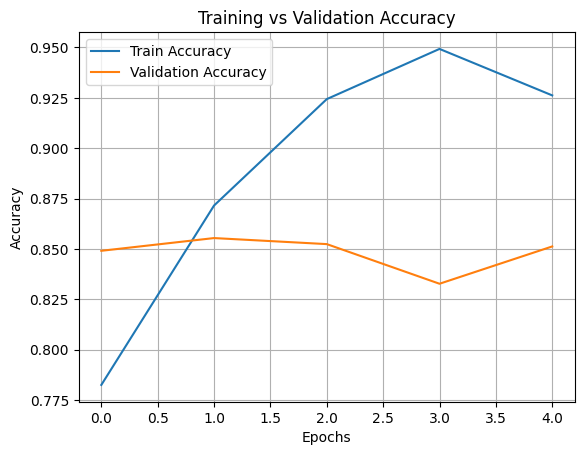

In [9]:
# Step 5: Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
# Step 6: Save the model
model.save("improved_sentiment_analysis_model.h5")